# Measuring a Waist Circumference using a Convex Hull

Start by loading a point cloud, and selecting a landmark we want to use to define where to begin a measurment 

In [46]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

key='csr0001a'
#data_path='/projects/datascience/shared/CAESAR Data AE2000/Processed/pk_data/'
data_path='../scripts/data/'

test=pickle.load(open(data_path+key+'.pk','rb'))

#point=test[key]['LM']['10th Rib Midspine']
point=test[key]['LM']['Rt. Radiale']

for k in test[key]['LM']:
    print(k)
#This is the point in the cloud that is the nearest to the landmark location
nearest_point=np.argmin([ np.linalg.norm(point-p) for p in  test[key]['PC']])



Sellion
Rt. Infraorbitale
Lt. Infraorbitale
Supramenton
Rt. Tragion
Rt. Gonion
Lt. Tragion
Lt. Gonion
Nuchale
Rt. Clavicale
Suprasternale
Lt. Clavicale
Rt. Thelion/Bustpoint
Lt. Thelion/Bustpoint
Substernale
Rt. 10th Rib
Rt. ASIS
Lt. 10th Rib
Lt. ASIS
Rt. Iliocristale
Rt. Trochanterion
Lt. Iliocristale
Lt. Trochanterion
Cervicale
10th Rib Midspine
Rt. PSIS
Lt. PSIS
Waist, Preferred, Post.
Rt. Acromion
Rt. Axilla, Ant
Rt. Radial Styloid
Rt. Axilla, Post.
Rt. Olecranon
Rt. Humeral Lateral Epicn
Rt. Humeral Medial Epicn
Rt. Radiale
Rt. Metacarpal Phal. II
Rt. Dactylion
Rt. Ulnar Styloid
Rt. Metacarpal-Phal. V
Lt. Acromion
Lt. Axilla, Ant
Lt. Radial Styloid
Lt. Axilla, Post.
Lt. Olecranon
Lt. Humeral Lateral Epicn
Lt. Humeral Medial Epicn
Lt. Radiale
Lt. Metacarpal-Phal. II
Lt. Dactylion
Lt. Ulnar Styloid
Lt. Metacarpal-Phal. V
Rt. Knee Crease
Rt. Femoral Lateral Epicn
Rt. Femoral Medial Epicn
Rt. Metatarsal-Phal. V
Rt. Lateral Malleolus
Rt. Medial Malleolus
Rt. Sphyrion
Rt. Metatarsal-Pha

## Select all points in a plane
We will select all points that have z value within 5/16' (7.93 mm) of the z-plane; this corresponds to the width of an average tape measurer. 

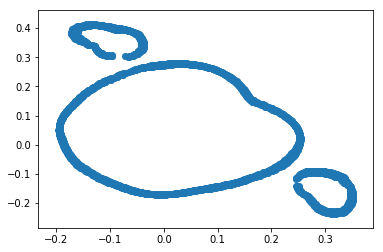

In [47]:


tape_width=7.9375/1000. #5/8 inch standard width of a tape measure                                                                              

selected_points=[(x,y) for x,y,z in test[key]['PC'] if np.abs(z-point[2]) < tape_width  ]


xarr,yarr=zip(*selected_points)
plt.scatter(xarr,yarr)
plt.show()



# Remove the Arms
We don't want to measure around the arms, so will use a clustering algorithm to divide this into three clusters

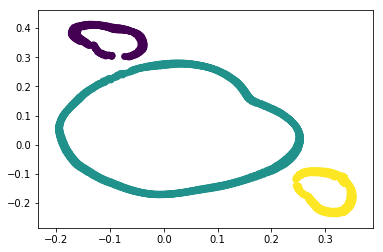

In [48]:
# Include the nearest_point from above as a handy way to grab the number of the cluster that we want
#(i.e the one containing our landmark )
selected_points.append(test[key]['PC'][nearest_point,[0,1]])
acluster=DBSCAN(eps=0.01,min_samples=5).fit(selected_points)
selected_cluster=acluster.labels_[-1]


xarr,yarr=zip(*selected_points)
plt.scatter(xarr,yarr,c=acluster.labels_ )
plt.show()


# Convex Hull
We can use a Convex Hull to simulate a tape measurure and get a circumference

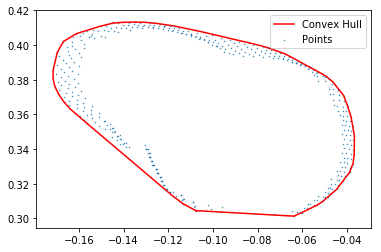

Waist at 10th Rib Midspine is  0.38924911312762106 Meters


In [49]:
#Select Points in the Same Cluster as our Landmark
perimeter_points=[(x,y) for i,(x,y) in enumerate(selected_points) if acluster.labels_[i]==selected_cluster]

#Fit a Convex Hull to these points
hull=ConvexHull(perimeter_points)
hull_x,hull_y=zip(*[perimeter_points[p] for p in hull.vertices])

hull_x=list(hull_x)
hull_y=list(hull_y)

hull_x.append(hull_x[0])
hull_y.append(hull_y[0])

xarr,yarr=zip(*perimeter_points)
plt.scatter(xarr,yarr,s=.2,label="Points")
plt.plot(hull_x,hull_y,color='red',label="Convex Hull")
plt.legend()
plt.show()




print("Waist at 10th Rib Midspine is ",hull.area,"Meters")

## hull.area
#Surface area of the convex hull when input dimension > 2. 
#When input points are 2-dimensional, this is the perimeter of the convex hull.

